BLACKJACK TRAINING:-

RULES OF BLACKJACK:-

1. Blackjack is played with one or more standard decks of 52 playing cards.
2. The goal of the game is to beat the dealer's hand without exceeding a total of 21 points.
3. Each card in the deck has a point value: numbered cards 2-10 are worth their face value, face cards (Jack, Queen, King) are worth 10 points each, and Aces can be worth 1 or 11 points, depending on the player's choice.
4. The game begins with each player, including the dealer, receiving two cards. The players' cards are dealt face-up, while one of the dealer's cards is dealt face-up, and the other is face-down (hole card).
5. Players take turns deciding whether to "hit" (receive another card from the dealer) or "stand" (keep their current hand).
6. If the player's hand exceeds 21 points, they "bust" and lose the round.
7. After all players have completed their turns, the dealer reveals their hole card.
8. The dealer must follow a specific rule set known as "house rules." Typically, the dealer must hit until their hand reaches a total of 17 or more points. If the dealer's hand exceeds 21 points, they bust.
9. If the dealer has not busted, the dealer's hand is compared to each player's hand individually.
10. If the player's hand has a higher point total than the dealer's hand without exceeding 21, the player wins and receives a payout of 1:1 (even money).
11. If the player's hand is equal to the dealer's hand, it is a "push" or a tie, and the player's bet is returned.
12. If the player's hand is lower in point value than the dealer's hand or if the player busts, the player loses the bet.
13. If a player's initial two cards have a point total of 21 (an Ace and a 10-point card, also known as a "natural" or "blackjack"), they win immediately, unless the dealer also has a blackjack, resulting in a push.
14. Insurance: If the dealer's face-up card is an Ace, players have the option to take "insurance" against the dealer having a blackjack. This is an additional bet of up to half the original bet. If the dealer has a blackjack, the insurance bet pays 2:1.
15. Some variations of Blackjack may allow additional options such as "splitting" pairs, "doubling down" (doubling the bet and receiving one more card), or "surrendering" (giving up the hand and losing only half the bet).
16. It's important to note that different casinos or regions may have slightly different rules and variations of Blackjack, so it's always a good idea to familiarize yourself with the specific rules of the table you're playing at.

OpenAI Gymnasium BlackJack Documentation Link:-

https://gymnasium.farama.org/environments/toy_text/blackjack/

Solving BlackJack:-

Installing and Importing Libraries:-

In [4]:
!pip install gymnasium==0.27.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.1/879.1 kB 3.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.0.1
    Uninstalling typing_extensions-4.0.1:
      Successfully uninstalled typing_extensions-4.0.1

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import seaborn as sns
from tqdm import tqdm #for progress bar to show loading
import gymnasium as gym

In [2]:
env = gym.make('Blackjack-v1',sab=True,render_mode="rgb_array")

Observing Environment:-

In [3]:
#Resetting Environment
done=False
observation,info = env.reset()

#observation = (16,9,False)

Note that the observation is a Tuple consisting of 3 Values:

1. Players current sum
2. Value of dealers face-up card
3. Boolean wether the player holds a usable Ace card

Executing an Action in the Environment:-

In [4]:
action = env.action_space.sample()

observation, reward, terminated, truncated, info = env.step(action)


In [5]:
class BlackjackAgent:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate and an epsilon.

        Args:
            learning_rate: The learning rate
            initial_epsilon: The initial epsilon value
            epsilon_decay: The decay for epsilon
            final_epsilon: The final epsilon value
            discount_factor: The discount factor for computing the Q-value
        """
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment
        if np.random.random() < self.epsilon:
            return env.action_space.sample()

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        """Updates the Q-value of an action."""
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )

        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - epsilon_decay)

Training Loop:

In [6]:
# hyperparameters
learning_rate = 0.01
n_episodes = 1000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

agent = BlackjackAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

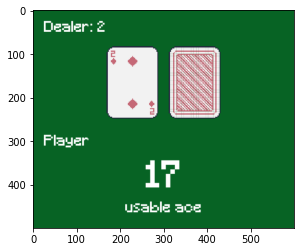

100%|██████████| 1000/1000 [02:29<00:00,  6.67it/s]


In [7]:
from IPython.display import clear_output
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False
    clear_output()

    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        agent.update(obs, action, reward, terminated, next_obs)
        frame = env.render()
        plt.imshow(frame)
        plt.show()
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

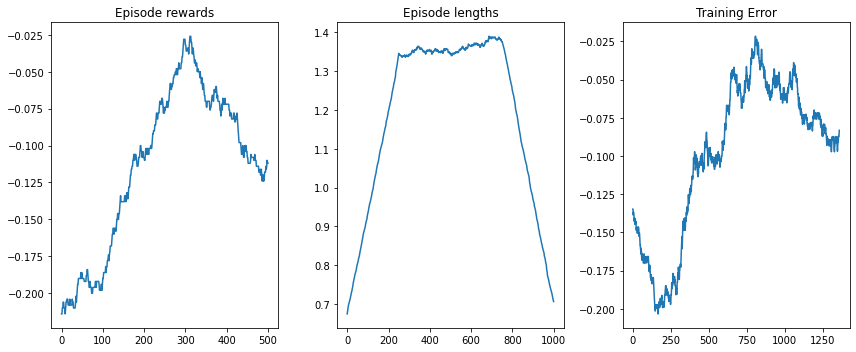

In [9]:
rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))
axs[0].set_title("Episode rewards")
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)
axs[2].set_title("Training Error")
training_error_moving_average = (
    np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same")
    / rolling_length
)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)
plt.tight_layout()
plt.show()

Blackjack Summary:

Hence the above graphs are a visual representation on  how the agent is trained using Q - Learning from the 1000 episodes. 

Hence, Q Learning proves to be efficient, easy to implement and effective for reinforcement learning for an agent tutorial.